<a href="https://colab.research.google.com/github/foxtrotmike/RL-MagLev/blob/master/RL-cat-mouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Learning with Neural Networks: A Simple Tutorial 

By Dr. Fayyaz Minhas (all rights reserved)

## Abstract

This is a very simple tutorial for neural networks based Q-learning. We use a simple example of a magnetic levitation system. The learning objectives are listed below:

1. Development of an understanding of the concepts of Q-learning
2. How can neural networks be used for approximation of the Q-function
3. How to develop a solution for a new problem using reinforcement learning
4. How to develop a custom environment
5. Complete end to end implementation of neural Q-learning in pyTorch

## Introduction

Reinforcement learning (RL) is a machine learning technique that lets an AI learn from its own experience. It has been around for quite a while now and has surfed the wave of neural networks and deep learning very well: See Alpha-Go, Alpha-Go Zero and Other DeepMind Projects. It also has the ability to lead to a general AI. 

To understand RL, it is interesting to understand the big picture first: Consider an agent that can interact with its environment by taking certain actions. The environment gives the agent a reward. As an example, consider a game of chess in which the player (agent) makes moves (an action) and receives a reward (win or lose). It is interesting to note that the reward can be delayed (till the end of the episode) and the agent may have no control over its environment which can change even without the actions of the player (e.g., by the action of the other player). Furthermore, the agent may have no knowledge of the internal working of the environment. The agent is to learn a "policy" that describes what actions to take in different states (board states in chess) so as to maximize its reward at the end of the episode (a single game). Think of reinforcement learning as a means of searching for the optimal policy. This is done using Q-learning.

## Q-learning

Consider an agent in state $s_t$ at time $t$. Assume that the agent takes an action $a_t$ and moves to state $s_{t+1}$ where it gets a reward $r_t$ for its action leading to state $s_{t+1}$. The "quality" of an action, i.e., how good or bad an action $a$ is in a particular state $s$, can be described by a Q-function $Q(s,a)$. If we know the Q-function, we can determine what is the optimal action in a given state. Thus, Q-function models the policy of the agent. We want to learn a Q-function that  maximizes the reward for the agent. In order to learn the Q-function, assume that we initialize the Q-function randomly, i.e., it will generate a random score for a given (state,action) pair. We would like to update the current value of the Q-function $Q(s_t,a_t)$ based on the reward $r_t$ of moving to state $s_{t+1}$ from $s_t$ by taking action $a_t$: if the reward of being in state $s_t$ is high, the value of $Q(s_t,a_t)$ should be increased and vice-versa. Additionally, if the state $s_{t+1}$ is a "favorable" state, i.e., actions in state $s_{t+1}$ can lead to highly favorable situations then the value of $Q(s_t,a_t)$ should be increased and vice-versa. The favorability or goodness of the state $s_{t+1}$ (tecnically called utility $U(s_{t+1})$) can be described by the maximum Q-value of the best action in that state, i.e., $U(s_{t+1})=max_a Q(s_{t+1},a)$. This leads us to update the Q-function in the following manner: $Q(s_t,a_t)^{new} \leftarrow (1-\alpha)Q(s_t,a_t)+\alpha(r_t+\gamma max_a Q(s_{t+1},a)$. Here, $\alpha \in [0,1]$ and $\gamma \in (0,1)$, called learning rate and discount factor, respectively, are two constants. Note that the update is a weighted combination of the previous value of $Q$ and the information obtained as a consequence of the agent's action. Before we go into the detail of these constants, try to convince yourself that the update equation indeed follows the requirements for the update above, i.e., the Q-value is updated based on:

1. Its previous value $Q(s_t,a_t)$: Higher the previous value, higher the new value
2. Reward $r_t$: Higher the reward, higher the new value
3. Utility of the state $U(s_{t+1})=max_a Q(s_{t+1},a)$: Higher the utility, higher the new  value

### Role of learning rate

The learning rate controls how much to add to the previous Q-value: If the old values are more reliable in comparison to the one obtained based on current reward and utility of the next state which can happen in noisy reward scenarios or uncertain utilities, the value of the learning rate should be set to low and high otherwise. However, if $\alpha=0$, not learning takes place. In fully deterministic environments, a learning rate of 1.0 is optimal since we know that the information being received in response to an action does not contain any noise or uncertainty. When the problem is stochastic, the algorithm converges under some technical conditions on the learning rate that require it to decrease to zero. 

### Role of discount factor

The discount factor controls the impact of the utility of the next state, i.e., it controls the effect of future rewards, since the utility value $U(s_{t+1})=max_a Q(s_{t+1},a)$ is based on Q-value of the state $s_{t+1}$ which is, in turn, based on rewards $r_{t+1}$ and $U(s_{t+2})$ and so on. To understand it better, note that the update equation for the Q-value is a recursive term and it involves $\gamma U(s_{t+1})$ and $U(s_{t+1})$ will involve $\gamma U(s_{t+2})$ and so on. Thus, the role of future utilies can be written as $\gamma^k U(s_{t+k})$. As a consequence, the larger the value of $gamma$, the more terms of future utilities will be included in the update of the current Q-value. Setting $gamma$ close to zero, would make the agent greedy as it will consider only the current reward and may not learn an effective policy that will maximize the future rewards. This is analogous to a chess player who goes on a "killing spree" by killing opponent's pieces as and when possible without considering that allowing an opponent's piece to be on the board can lead to better states in the future.

### Algorithm Description

Now one might ask the question, how does this work in practice? This is how.

One starts off with a random Q-value function. In a given episode, the agent is "spawned" in an intial state in which the agent makes a move based on the Q-value, i.e., pick an action based on the highest Q-value across all possible actions in that state. This will change the state of the agent and the agent will receive a reward. Based on this, the agent will update the Q-value of the previous state. Then the agent will pick another action and keep updating it until either the end or terminal state is reached or the user defined threshold on the number of steps in an episode expires. This is repeated for a number of episodes until the Q-values stop changing. It is important to note that if all the updates are based on optimal Q-values, the agent might not explore all possible states or actions. As a consequence, an $\epsilon$-greedy policy is typically employed in whcih an agent takes random actions at a given state, instead of consulting the Q-value function, with a small probability $\epsilon \ge 0$. Typically, $\epsilon$ is initialized to a high value (0.9) and gradually decreased over episodes or number of total steps. Similarly, the learning rate is also "annealed" or decreased gradually as the Q-function becomes more "learned" over episodes. The discount factor is also increased gradually to model the improved certainty of future rewards over episodes. 

### Implementation using Q-tables or Neural Networks

It is interesting to note that $Q(s,a)$ is a function that, gives a value for a given state and action as input. We want to learn this function using the Q-learning update equation. If the states and actions are discrete and finite, then we can use a simple table that stores the Q-value of a given state-action pair. However, if the states or actions are continuous or infinite, this is not possible. For such cases, we can use neural networks.

Neural networks are universal function approximators that can approximate the value of a function $f(x)$ based on its inputs $x$. This is done by minimizing an error or loss function between the output of a neural network $F(x)$ and the target value $f(x)$ over a set of training examples by updating the weight parameters of the network. 

We can use a neural network to "store" the Q-table or approximate the Q-function. Think of it this way: Instead of getting the Q-values from the Q-table, we will get them from the neural network. However, the issue with RL is that we do not know the optimal Q-function before hand and it must be learned on the fly. Thus, we will be simultaneously learning the Q-function and the neural network that approximates it. This is how it can be done.

We can start off the agent in a certain state $s_t$ and use the neural network to give the Q-value for a given action by giving the neural network the current state-action pair or by using the $\epsilon$ greedy policy that allows the agent to take random actions too. As a consequence, we will get a new Q value based on the update equation. We can store the current state-action pair and its updated Q-value in a memory or "replay queue" which can store up to a certain number of such training examples in it. We then do a certain number of training epochs over randomly selected input-output pairs where the input is the state-action pair and the output is the corresponding q-value. Repeating this process over a number of episodes will train the neural network to approximate the Q-function.

However, we are going to start learning about it by controlling the position of a metallic ball using a magnet.

## Magnetic Levitation System

Consider a metallic ball of mass $m$ at positiopn $x_0$ moving with velocity $v_0$ at time $t$ which is acted upon by gravity in the downwards direction and a fixed force $F$ in the upward direction resulting from an electromagnet that can be switched on (action A = 1) or off (action A = 0) to control the position of the ball along the vertical. Thus, the net force $aF-mg$ causes acceleration $a=(AF-mg)/m$ in the mass. In a given time step $dt = 0.01$, the  velocity of the ball at time $t+dt$ becomoes $v = v_0+a*dt$ and its new position will be $x = x_0+v_dt+0.5a(dt)^2$. Thus far we have modeled the physics of the problem and the state of the system can be described by a vector $(v,x)$.

The objective here is to develop an intelligent agent that can switch the electromagnet on or off so that the ball reaches a certain reference position. For this purpose, the environment gives the agent a reward in a given state based on how close the current position is to the target, i.e., $r=-|x-x_{ref}|$. 

We can implement this system as an Open AI Gym Environment that allows us to model the physics, visualize, and get rewards. The most important function is the step function which takes in an action and retursn the state and rewrard based on the system's current state. The complete implementation is given below.

In [114]:
"""
Created on Mon Aug 13 15:22:11 2018
A simple example of a custom gym environment for a magnetic levitation system
Imagine an iron ball of mass m placed at a certain location along the y-axis
and a magentic force F pulling it up. How can we control its position?
@author: Fayyaz Minhas, Noushan and Abdullah
"""
import gym
from gym import spaces
import logging
import numpy as np
import matplotlib.pyplot as plt
import random
from cmath import polar,rect
from math import pi,atan2,cos,sin

class CatMouse(gym.Env):
    metadata = {'render.modes': ['human']}    
    
    def __init__(self):
        
        self.__version__ = "0.0.1.0"
        logging.info("Cat-Mouse - Version {}".format(self.__version__))
        self.naction = 8
        self.t = 0.0 #current time 
        self.m = 3.0
        self.d = 0.05
        self.T = 500.0
        self.R = 1.0

        
        #self.action_space = spaces.Discrete(2)
        #self.observation_space = spaces.Box(np.array([-20,-0.1]), np.array([+20, 10]), dtype=np.float32)
        
        self.lastAction = 0

        
        self.reset()
        
    def step(self, action):
        """

        Parameters
        ----------
        action :

        Returns
        -------
        obs, reward, episode_over, info : tuple
            ob (object) :
                an environment-specific object representing your observation of
                the environment.
            reward (float) :
                amount of reward achieved by the previous action. The scale
                varies between environments, but the goal is always to increase
                your total reward.
            episode_over (bool) :
                whether it's time to reset the environment again. Most (but not
                all) tasks are divided up into well-defined episodes, and done
                being True indicates the episode has terminated. (For example,
                perhaps the pole tipped too far, or you lost your last life.)
            info (dict) :
                 diagnostic information useful for debugging. It can sometimes
                 be useful for learning (for example, it might contain the raw
                 probabilities behind the environment's last state change).
                 However, official evaluations of your agent are not allowed to
                 use this for learning.
        """
        self._take_action(action)
        self.lastAction = action
        self.t+=1.0
        reward = self._get_reward()
        obs = self._get_state()
        tc,pmx,pmy = obs
        done = polar(complex(pmx,pmy))[0]>self.R or self.t>=(self.T-1)
        """
        if not self.observation_space.contains(obs):
            done = True
        """
        
        return obs, reward, done, {}
        
    def reset(self):
        """
        Reset the state of the environment and returns an initial observation.
        Returns
        -------
        observation (object): the initial observation of the space.
        """
        
        self.tc = 2*pi*np.random.rand()
        self.pm = rect(self.R*np.random.rand(),2*pi*np.random.rand())
        self.t=0

        return self._get_state()

    def render(self, figid = 0):
        """
        Shows a ball with the position indicated by the position. Velocity is 
        proportional to the size of the ball. The current action is shown in 
        color of the ball with blue indicating no upward force and red if the
        force is active.
        """
        
        plt.figure(figid);plt.ion()
        circle= plt.Circle((0,0), radius= self.R)
        pc = rect(self.R,self.tc)
        pm = self.pm
        ax=plt.gca()
        #ax.clear();
        ax.axis([-1.5,1.5,-1.5,1.5]);ax.grid();ax.set_aspect('equal', 'box');ax.add_patch(circle)
        ax.plot(pc.real,pc.imag,'k^')
        ax.plot(pm.real,pm.imag,'mo') 
        plt.draw();plt.pause(0.05)
       

    def _take_action(self, action):
        """
        Model the effect of the action taken and update state.
        Simple modeling of physics.
        """
        t = action*(2*np.pi/self.naction)
        self.pm+=rect(self.d,t)
        rm,tm = polar(self.pm)
        rc,tc = self.R,self.tc
        s = 2*(atan2(sin(tm-tc), cos(tm-tc))*180/pi>0)-1 
        tc+=s*self.m*self.d/rc
        self.tc = tc
       
            
    def _get_state(self):
        
        """Get the observation."""
        
        obs = np.asarray(list((self.tc,self.pm.real,self.pm.imag))) #theta cat, nouse real imag, time prop ,(self.t+1.0)/self.T
        return obs
            
    def isSucessful(self):
      tc,pmx,pmy = self._get_state()
      pc = rect(self.R,tc) #position of the cat
      pm = complex(pmx,pmy) #position of the mouse
      dcm = polar(pm-pc)[0] #distance between cat and mouse
      outside = polar(pm)[0]>self.R #mouse outside?
      not_eaten = dcm>(self.m*self.d)
      health = 1.0-self.t/(self.T-1)
      success = health*outside*not_eaten
      return success,outside,not_eaten,health,dcm

    def _get_reward(self):
        """
        Reward function.
        """
        success,outside,not_eaten,health,dcm = self.isSucessful()
        reward = success+outside+not_eaten+health+dcm


           
        return reward
    
    def __str__(self):
        return str(self._get_state())

One can now create and environment and observe the effects of the actions as shown below.

In [115]:
env = CatMouse()
s = env._get_state()
print(env)
for _ in range(500):
  a = np.random.randint(env.naction)
  obs, reward, done, _ = env.step(a)
  #env.render();plt.show()
  
  if done:
    print(reward) 
    break

[ 3.72744499e+00 -2.02845247e-03  4.13153192e-01]
1.6559500362002284


In [100]:
obs

array([ 5.08385518,  0.50041235, -0.87963523])

Below is the complete implementation of a Neural Q-learning algorithm. A neural Q-learning program will consist of three parts: environment, neural network and Q-learning. We have already implemented the environemtn. We use a simple neural network with 2 inputs (corresponding to the two state variables), 200 hidden neurons with ReLU activations and 2 outputs (corresponding to Q-values for each action). For details, see the neural network class implementation below.  A single episode (executed by the run_episode function) consists of 500 steps in whcih the environment is initialized (reset) and the actions are determined using an epsilon greedy policy with annealed epsilon values together with the neural network (see the select_action function). At each step, the neural network picks up 64 examples at random and uses them to learn the Q-function (see the learn function). The number of episodes is set to 70. It is important to note that the only information of the environment visible to neural network is the one given by the environment (position, velocity and reward). The internal workings of the environment are not visible to Q-learning. We have a Q-learning rate of 1.0 and a discount factor of 0.98 since the environment is deterministric. The target position is 5.0.

In [116]:
import random
import math
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
#from maglevEnv import MagLevEnv
import numpy as np

# hyper parameters
EPISODES = 1000  # number of episodes
EPS_START = 0.9  # e-greedy threshold start value
EPS_END = 0.01 # e-greedy threshold end value
EPS_DECAY = 1000  # e-greedy threshold decay
GAMMA = 0.98  # Q-learning discount factor
LR = 0.005  # NN optimizer learning rate
BATCH_SIZE = 64  # Q-learning batch size

# if gpu is to be used
use_cuda = torch.cuda.is_available()
FloatTensor = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if use_cuda else torch.LongTensor
ByteTensor = torch.cuda.ByteTensor if use_cuda else torch.ByteTensor
Tensor = FloatTensor


class ReplayMemory:
    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []

    def push(self, transition):
        self.memory.append(transition)
        if len(self.memory) > self.capacity:
            del self.memory[0]

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)


class Network(nn.Module):
    def __init__(self):
        nn.Module.__init__(self)
        self.l1 = nn.Linear(3, 200)
        self.l3 = nn.Linear(200, 8)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = (self.l3(x))
        return x

env = env = CatMouse()
model = Network()
if use_cuda:
    model.cuda()
memory = ReplayMemory(10000)
optimizer = optim.Adam(model.parameters(), LR)
steps_done = 0
episode_durations = []


def select_action(state):
    global steps_done
    sample = random.random()
    eps_threshold = EPS_END + (EPS_START - EPS_END) * math.exp(-1. * steps_done / EPS_DECAY)
    steps_done += 1
    if sample > eps_threshold:
        return model(Variable(state, volatile=True).type(FloatTensor)).data.max(1)[1].view(1, 1)
    else:
        return LongTensor([[random.randrange(8)]])


def run_episode(e, environment):
    
    state = environment.reset()    
    steps = 0
    while True:
        steps += 1
        
        action = select_action(FloatTensor([state]))
        a = action.data.numpy()[0,0]
        next_state, reward, done, _ = environment.step(a)
        print(reward)


        memory.push((FloatTensor([state]),
                     action,  # action is already a tensor
                     FloatTensor([next_state]),
                     FloatTensor([reward])))

        
        learn()

        state = next_state

        if done:            
            break
            


def learn():
    global GAMMA
    if len(memory) < BATCH_SIZE:
        return
    
    # random transition batch is taken from experience replay memory
    transitions = memory.sample(BATCH_SIZE)
    batch_state, batch_action, batch_next_state, batch_reward = zip(*transitions)

    batch_state = Variable(torch.cat(batch_state))
    batch_action = Variable(torch.cat(batch_action))
    batch_reward = Variable(torch.cat(batch_reward))
    batch_next_state = Variable(torch.cat(batch_next_state))

    # current Q values are estimated by NN for all actions
    current_q_values = model(batch_state).gather(1, batch_action)
    # expected Q values are estimated from actions which gives maximum Q value
    max_next_q_values = model(batch_next_state).detach().max(1)[0]
        

    expected_q_values = batch_reward + (GAMMA * max_next_q_values)

    # loss is measured from error between current and newly expected Q values
    loss = F.smooth_l1_loss(current_q_values, expected_q_values.view(BATCH_SIZE,1))

    # backpropagation of loss to NN
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



def plotError():
    plt.figure(2)
    plt.clf()
    durations_t = torch.FloatTensor(episode_durations)
    plt.title(str(steps_done))
    plt.xlabel('Episode')
    plt.ylabel('Final Position Error')
    plt.plot(durations_t.numpy())
    # take 100 episode averages and plot them too
    H = 10
    if len(durations_t) >= H:
        means = durations_t.unfold(0, H, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(H-1), means))
        plt.plot(means.numpy())

    plt.pause(0.001)  # pause a bit so that plots are updated



for e in range(EPISODES):
    run_episode(e, env)

print('Complete')

3.3583924447762357
3.361829468777663
3.314119625969739
3.2877824898413754
3.2634523107535998
3.2441095834972513
3.2162135260301223
3.17902325312044
3.0471233392241457
3.0055123983827006
2.8777055871641597
2.7599361480885998
2.654939505704278
2.578024991840926
2.523992344483986
2.430720734297943
2.388311782393233
2.3637900427370395
2.337302353601277
2.32122739285755
2.278738196063756
2.310204342872238
2.3645958141665213
2.3061963268401735
2.270722163999628
2.2726494040881318
2.249526953175207
2.273150284543569
2.245518937143143
2.2488373833263533
2.2887393740227977
2.334481679738874
2.382079800548854
2.4002289297591304
2.3469644705905877
2.33650617167483
2.3024085808323664
2.3324981556427664
2.3631021679843447
2.328490139610702
2.3581436534565734
2.329934695949909
2.3541356374245095
2.3801888495988095
2.3883898790990545
2.4289632634474136
2.4117238254020896
2.4623263403626496
2.4788679508426434
2.447361389039554
2.407112781571329
2.3542625212782573
2.374487426814138
2.4262848686750713
2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Streaming output truncated to the last 5000 lines.
2.3340463785394308
2.306407216131524
2.2507691168672284
2.2046432768009625
2.1858253075485896
1.106225870583779
1.1194573854190903
1.0292837138590518
2.0520723981074784
3.0531106989842867
2.996968195980134
2.928166767312904
2.8474132585601413
2.755703301655122
2.6544874083873524
2.5460659304374165
2.4346274362537152
2.3292508916079155
2.2520183984911224
2.231065454511496
2.1506355182894317
2.1398413736835096
1.0556870339471993
1.0747103499050057
2.0271934779474186
2.7289041844314728
2.5888447579538316
2.4471505952358625
2.3151276926948494
2.226742329929908
2.2745510462044436
2.222734313897844
2.2076187867738044
2.152809136841116
1.1049300737458259
1.1273538737031483
1.0108141416221341
2.0876584777661327
3.285256616920199
3.1837405561255903
3.087731121662376
2.9988747403055305
2.918732797606341
2.848653977798725
2.7895955754311936
2.7419181959819543
2.7052146926576035
2.6782536551085325
2.659088529257237
2.645310186409625
2.634356700978

Once the learning is complete, we can test the performance of the neural network.

In [123]:
state = env.reset()
S = []
for i in range(500):    
    action = select_action(FloatTensor([state]))
    a = action.data.numpy()[0,0]
    state,reward,done,_ = env.step(a)
    S.append(state)
    print(i,state,a,reward,done)
    if done:
        print(env.isSucessful())
        break
    env.render()

S = np.array(S) 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


0 [3.19044168 0.24778736 0.34707357] 2 3.3059474908045896 False
1 [3.04044168 0.24778736 0.39707357] 2 3.273456576692987 False
2 [2.89044168 0.24778736 0.44707357] 2 3.2265008046520345 False
3 [2.74044168 0.24778736 0.49707357] 2 3.1652358757137327 False
4 [2.59044168 0.24778736 0.54707357] 2 3.0899387208898776 False
5 [2.44044168 0.24778736 0.59707357] 2 3.0010024776637083 False
6 [2.29044168 0.24778736 0.64707357] 2 2.8989315215829383 False
7 [2.14044168 0.24778736 0.69707357] 2 2.7843363378222667 False
8 [1.99044168 0.24778736 0.74707357] 2 2.657928098376051 False
9 [1.84044168 0.24778736 0.79707357] 2 2.5205128694559793 False
10 [1.69044168 0.24778736 0.84707357] 2 2.3729854371419163 False
11 [1.54044168 0.24778736 0.89707357] 2 2.216322957599763 False
12 [1.39044168 0.24778736 0.94707357] 2 1.0515825971949844 False
13 [1.24044168 0.24778736 0.99707357] 2 2.0640424242432185 True
(0.0, True, False, 0.9719438877755511, 0.09209853646766737)


In [118]:
env.isSucessful()

(0.9979959919839679, True, True, 0.9979959919839679, 0.6908280544591591)

We can now plot the position vs. the steps for the test case.

Text(0, 0.5, 'position')

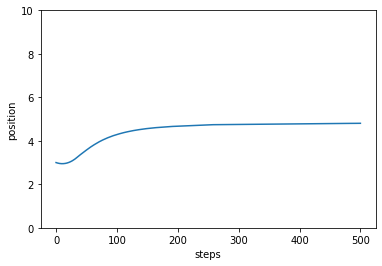

In [ ]:
fig, ax = plt.subplots()
ax.set_ylim([0,10])
plt.plot(S[:,1]); plt.xlabel('steps'); plt.ylabel('position')

We can also plot the policy (the action being taken) in different regions of the state space and overlay the movement of the ball in the test case.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


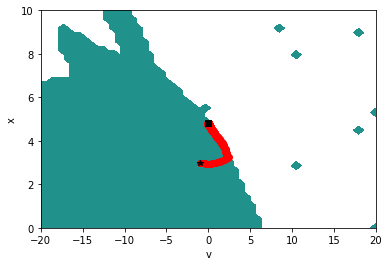

In [ ]:
#%% Plotting the policy in the state space.
x = np.linspace(0, 10, 50)
v = np.linspace(-20, 20, 60)
A = np.zeros((len(x),len(v)))
for i,xi in enumerate(x):
    for j,vj in enumerate(v):
        A[i,j] = select_action(FloatTensor([[vj,xi]])).data.numpy()[0,0]
plt.figure(3)
plt.contourf(v,x,A,levels=[0.1,1]);
plt.xlabel("v"); plt.ylabel("x")
plt.scatter(S[:,0],S[:,1],c='r'); plt.plot(S[0,0],S[0,1],c = 'k', marker ='*'); plt.scatter(S[-1,0],S[-1,1],c = 'k', marker ='s')


## Further Exercises

1. What is the response of the neural network if the mass of the ball is changed in testing?
2. Write a reinforcement learning program which learns a policy for every possible mass of the ball from 0.2 to 1.9 kgs.
3. Write a reinforcement learning program which learns a policy for every possible integer reference point between 0 and 10.

### Acknowledgements
I would like to recognize the effort by Noushan and Abdullah at PIEAS Data Science Lab for their contributions in the code. We will also like to acknowledge the support from HEC and PIEAS in setting up PIEAS Data Science Lab under the Institutional Strengthening Program.